### Support Vector Regression (SVR) using linear and non-linear kernels¶
The method of Support Vector Classification can be extended to solve regression problems. This method is called Support Vector Regression. Just like in support vector classification, the model produced by Support Vector Regression depends only on a subset of the training data, because the cost function for building the model ignores any training data close to the model prediction.

We will generate 1D regression using linear, polynomial and RBF kernels. Let us firstly import the required libraries and upload the natural gas dataset.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

print(__doc__)

import numpy as np
from sklearn.svm import SVR

Automatically created module for IPython interactive environment


In [2]:
# Read the data set
df=pd.read_excel("data/DataSet_GasPrice_ Outlier_Removed.xlsx")
df.head()

,Days,Date,AveCoalPrice,OilPrice,GrossGasProd,TotGasCons,GasPrice,Weather,WSTAT,GasPriceStatus,GPSAT,color
0,245,2008-12-31,57.22,41.12,2227.028,2399.702,5.82,WINTER,1,HIGH,1,1
1,276,2009-01-31,54.37,41.71,2251.938,2729.715,5.24,WINTER,1,HIGH,1,1
2,304,2009-02-28,52.30,39.09,2074.167,2332.539,4.52,WINTER,1,HIGH,1,1
3,335,2009-03-31,44.34,47.94,2262.488,2170.709,3.96,WINTER,1,HIGH,1,1
4,365,2009-04-30,41.92,49.65,2147.856,1741.293,3.50,SPRING,0,HIGH,1,1


### Regressing Gas Price against Average Coal Price
Let us convert the features: GasPrice and Weather status to numpy arrays

In [3]:
# Use only one feature
X = df.AveCoalPrice[:, np.newaxis]
X_temp = X[:,]
y = df.GasPrice

We will now fit regression models and then compare the results in a plot

In [4]:
svr_rbf = SVR(kernel='rbf', C=1, gamma=0.5)
svr_lin = SVR(kernel='linear', C=1)
svr_poly = SVR(kernel='poly', C=1, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

C:\Users\Angus\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
C:\Users\Angus\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Angus\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


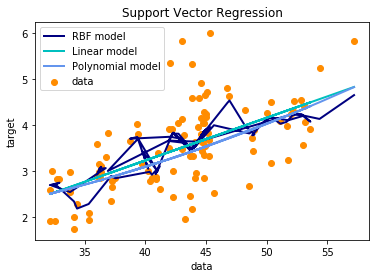

In [5]:
# plot the results
lw = 2
plt.scatter(X, y, color='darkorange', label='data')
plt.hold('on')
plt.plot(X_temp, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [ ]:
# convert dfcoal to and the target 'WSTAT' column to numpy array
X = df.GasPrice.values
y = df.WSTAT.values

In [ ]:
X.shape

In [ ]:
X.reshape(-1, 1)

In [ ]:
X.shape

In [ ]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

In [ ]:
import numpy as np
import pylab as pl
import pandas as pd

from sklearn import svm
from sklearn import linear_model
from sklearn import tree

from sklearn.metrics import confusion_matrix

x_min, x_max = 0, 15
y_min, y_max = 0, 10
step = .1
# to plot the boundary, we're going to create a matrix of every possible point
# then label each point as a wolf or cow using our classifier
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

df = pd.DataFrame(data={'X': xx.ravel(), 'Y': yy.ravel()})

df['color_gauge'] = (df.X-7.5)**2 + (df.Y-5)**2
df['color'] = df.color_gauge.apply(lambda X: "red" if X <= 15 else "green")
df['color_as_int'] = df.color.apply(lambda X: 0 if X=="red" else 1)

print ("Points on flag:")
print (df.groupby('color').size())
print

figure = 1

# plot a figure for the entire dataset
for color in df.color.unique():
    idx = df.color==color
    pl.subplot(2, 2, figure)
    pl.scatter(df[idx].X, df[idx].Y, color=color)
    pl.title('Actual')


#train_idx = df.x < 10

train = X_train
test =  X_test

#train = df[train_idx]
#test = df[-train_idx]


print ("Training Set Size: %d" % len(train))
print ("Test Set Size: %d" % len(test))

# train using the x and y position coordiantes
cols = ["X", "Y"]

clfs = {
    "SVM": svm.SVC(degree=0.5),
    "Logistic" : linear_model.LogisticRegression(),
    "Decision Tree": tree.DecisionTreeClassifier()
}


# racehorse different classifiers and plot the results
for clf_name, clf in clfs.items():
    figure += 1

    # train the classifier
    clf.fit(X_train, y_train)

    # get the predicted values from the test set
    test = clf.predict(X_test)
    y_test = test.apply(lambda x: "red" if x==0 else "green")

    # create a new subplot on the plot
    pl.subplot(2, 2, figure)
    # plot each predicted color
    for color in test.pred_color.unique():
        # plot only rows where pred_color is equal to color
        idx = test.pred_color==color
        pl.scatter(test[idx].X, test[idx].Y, color=color)

    # plot the training set as well
    for color in train.color.unique():
        idx = train.color==color
        pl.scatter(train[idx].X, train[idx].Y, color=color)

    # add a dotted line to show the boundary between the training and test set
    # (everything to the right of the line is in the test set)
    #this plots a vertical line
    train_line_y = np.linspace(y_min, y_max) #evenly spaced array from 0 to 10
    train_line_x = np.repeat(10, len(train_line_y)) #repeat 10 (threshold for traininset) n times
    # add a black, dotted line to the subplot
    pl.plot(train_line_x, train_line_y, 'k--', color="black")

    pl.title(clf_name)

    print ("Confusion Matrix for %s:" % clf_name)
    print (confusion_matrix(test.color, test.pred_color))
pl.show()

In [ ]:
test[cols]